## I3 R3: Logistic Regression

In [ ]:
# import packages
import numpy as np
import pandas as pd

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_to_data = "/content/drive/My Drive/CP5046 ICT1 Project folder_Group2 Junyu Siddhanth/Siddhanth/Dev Package/Data/Test_Data_Result_(2).xlsx"

# see dataset using pandas dataframe
df = pd.read_excel(path_to_data)
df.head()

,Label(0=Pre/1=Post),Age in Days,"Gender(0=M,1=F)","Sick Baby(0=N,1=Y)",S1,E1,S2,E2,S3,E3,S4,E4,S5,E5,bowelSounds/min,Avg duration
0,1,4,1,0,9.52,16.01,23.79,35.23,NaN,NaN,NaN,NaN,NaN,NaN,4.67,8.96
1,1,3,0,0,11.12,15.83,27.85,35.32,43.04,45.15,57.41,64.80,NaN,NaN,4.47,5.42
2,0,5,0,0,4.79,12.76,17.21,26.53,32.06,43.00,50.08,56.84,NaN,NaN,4.61,8.75
3,0,2,0,1,3.95,6.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.93,3.01
4,1,5,0,1,11.02,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.62,5.65


-----------------------------
We want to do a Logistic Regression to predict whether a baby has a sickness based on the baby's Bowel sound rate.

Hence, our x is bowel sound rate, and y is Sickness of a baby.

Bowel sound rate is number of bowel sounds per minute. Sickness is noted with 0=No sickness, and 1=Yes there is sickness.

In [ ]:
# import visualization tools matplotlib and seaborn
import matplotlib.pyplot as plt
import numpy as np

# import sklearn for Logistic regression and its evaluation techniques such as classification report and confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# converting dataframe columns to arrays, to fit into model
x= np.array(df['bowelSounds/min']).reshape(-1,1)
y= np.array(df['Sick Baby(0=N,1=Y)'])

In [ ]:
# creating the Logistic Regression model using sklearn
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
print("The distinct values that y takes: ", model.classes_)
print("Intercept of the model:           ", model.intercept_)
print("Slope of the model:               ", model.coef_)

The distinct values that y takes:  [0 1]
Intercept of the model:            [-1.97904598]
Slope of the model:                [[0.26670422]]


This Logistic Regression model is a type of binary classification (2 groups: Yes or No sickness).


---

Evaluating the model:


In [ ]:
# predicting the sickness value from the dataset
model.predict(x)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
# .score() takes the input and output as arguments and 
# returns the ratio of the number of correct predictions to the number of observations.
model.score(x, y)

0.89

The model predicts 89% of the observations accurately.

In [ ]:
# use confusion_matrix() to provide the actual and predicted outputs
confusion_matrix(y, model.predict(x))

array([[38,  5],
       [ 6, 51]])

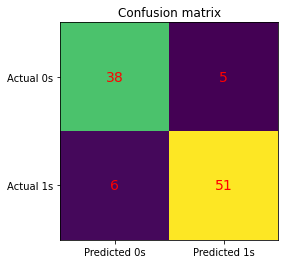

In [ ]:
# plot the confusion matrix in a heatmap

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', size='14')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# a more comprehensive report on the classification using classification_report()
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.91      0.89      0.90        57

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



The model predicts 89% of the observations accurately.

The model has a 91% precision for precting the observations correctly when the baby has a sickness.